In [32]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [97]:
#Loading data
path = '/content/4A_cleaned_7.xlsx'
data =pd.read_excel(path)
data.head(2)

,IP NUMBER,UNIT,SEX,AGE,MARITAL STATUS,RELIGION,DISTRICT OF RESIDENCE,REGION,WORKING DIAGNOSIS,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,DAY OF ADMISSION,MONTH OF ADMISSION,YEAR OF ADMISSION,DURATION,OUT COME
0,1861416,GI,M,30,2,COU,Nakasongola,CENTRAL,"ISS,Abdominal TB,,","ISS,,",1,Abdominal_TB,5,Tuesday,November,2010,5,IMPROVED
1,1868011,GI,F,46,2,COU,Kampala,CENTRAL,"ISS Stage I&II,Disseminated TB,,","ISS Stage I&II,,",1,Disseminated TB,3,Monday,December,2010,3,IMPROVED


In [98]:
data['TB_type'].unique()

array(['Abdominal_TB', 'Disseminated TB', 'PTB', 'Other TBs', 'CNS_TB',
       'TB iris'], dtype=object)

#**Preparing data**

In [99]:
data.dropna(subset=['NUMBER OF PREVIOUS ADMISSIONS'], inplace=True)
data.dropna(subset=['IP NUMBER'], inplace=True)

data = data[data['IP NUMBER']  != 'a' ]
data = data[data['IP NUMBER']  != 'vf' ]

In [100]:
data.shape

(4034, 18)

In [101]:
#data.to_excel('final_cleaned_TB-4a.xlsx', index=False)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 0 to 4033
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   IP NUMBER                               4034 non-null   object
 1   UNIT                                    4034 non-null   object
 2   SEX                                     4034 non-null   object
 3   AGE                                     4034 non-null   int64 
 4   MARITAL STATUS                          4031 non-null   object
 5   RELIGION                                4034 non-null   object
 6   DISTRICT OF RESIDENCE                   4034 non-null   object
 7   REGION                                  4034 non-null   object
 8   WORKING DIAGNOSIS                       4034 non-null   object
 9   ADDITIONAL WORKING DIAGNOSIS            3854 non-null   object
 10  NUMBER OF ADDITIONAL WORKING DIAGNOSIS  4034 non-null   int64 
 11  TB_t

In [103]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [104]:
#Deleting features which are not going to be used
features_to_remove = ['IP NUMBER', 'UNIT','YEAR OF ADMISSION','DISTRICT OF RESIDENCE','WORKING DIAGNOSIS' ,'ADDITIONAL WORKING DIAGNOSIS',
                'MARITAL STATUS']
data = data.drop(columns = features_to_remove)

In [106]:

non_features = ['OUT COME']
data1 = data.drop(columns=non_features)

##**Data Preprocessing**

In [107]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [108]:
#data['YEAR OF ADMISSION'] = data['YEAR OF ADMISSION'].astype(str)

In [109]:
#Encoding categorical features
non_features = ['DURATION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','AGE','NUMBER OF PREVIOUS ADMISSIONS']
data1 = data.drop(columns=non_features)

text_columns = data1.select_dtypes(include=['object']).columns

data2 = pd.get_dummies(data, columns=text_columns)

In [110]:
data2['NUMBER OF PREVIOUS ADMISSIONS'].unique()

array([ 2,  4,  5,  1,  7,  6,  9, 20, 11, 13,  3,  8, 15, 14, 10, 18, 16,
       22, 21, 25, 12, 26, 23, 92,  0])

In [111]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'] = data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].astype(float)
data2['AGE'] = data2['AGE'].astype(float)

In [112]:
data2.sample(4)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,DURATION,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,RELIGION_OTHERS,...,MONTH OF ADMISSION_February,MONTH OF ADMISSION_January,MONTH OF ADMISSION_July,MONTH OF ADMISSION_June,MONTH OF ADMISSION_March,MONTH OF ADMISSION_May,MONTH OF ADMISSION_November,MONTH OF ADMISSION_October,MONTH OF ADMISSION_September,OUT COME_DIED
3892,45.0,2.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
267,36.0,3.0,9,9,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2460,43.0,0.0,0,3,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1192,30.0,1.0,0,2,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [113]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 5 to 4030
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   AGE                                     1291 non-null   float64
 1   NUMBER OF ADDITIONAL WORKING DIAGNOSIS  1291 non-null   float64
 2   NUMBER OF PREVIOUS ADMISSIONS           1291 non-null   int64  
 3   DURATION                                1291 non-null   int64  
 4   SEX_F                                   1291 non-null   uint8  
 5   SEX_M                                   1291 non-null   uint8  
 6   RELIGION_CATHOLIC                       1291 non-null   uint8  
 7   RELIGION_COU                            1291 non-null   uint8  
 8   RELIGION_ISLAM                          1291 non-null   uint8  
 9   RELIGION_OTHERS                         1291 non-null   uint8  
 10  RELIGION_PENTECOSTAL                    1291 non-null   uint

AGE
0.9509241869210756


<ipython-input-114-91287cc1e385>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


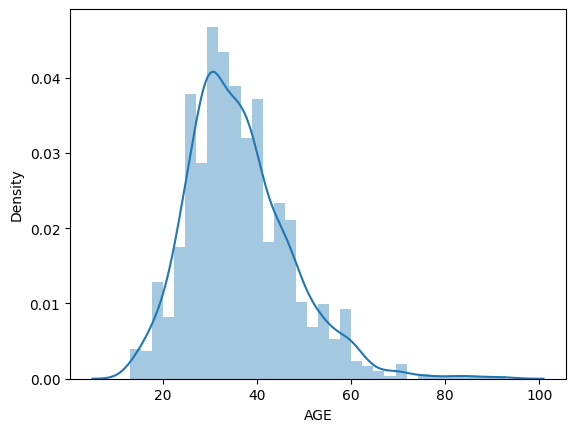

NUMBER OF PREVIOUS ADMISSIONS
9.760011787542462


<ipython-input-114-91287cc1e385>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


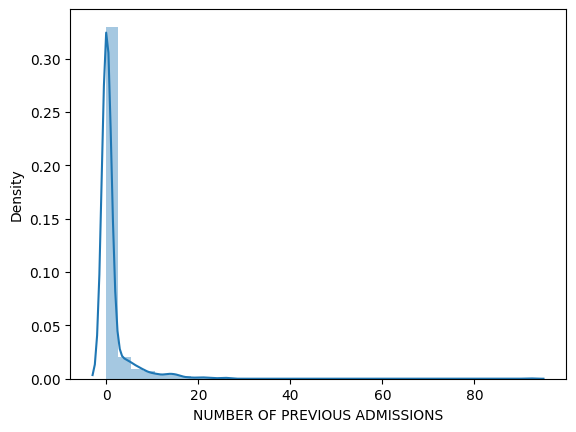

NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0.47741907750448015


<ipython-input-114-91287cc1e385>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


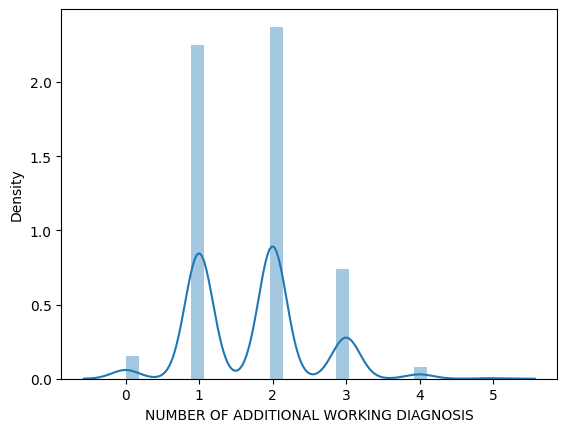

In [114]:
from scipy.stats import skew
import seaborn as sns

#Visualizing skeness of the continuous features
continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
for col in continuous_features:
  print(col)
  print(skew(data2[col]))

  plt.figure()
  sns.distplot(data2[col])
  plt.show()

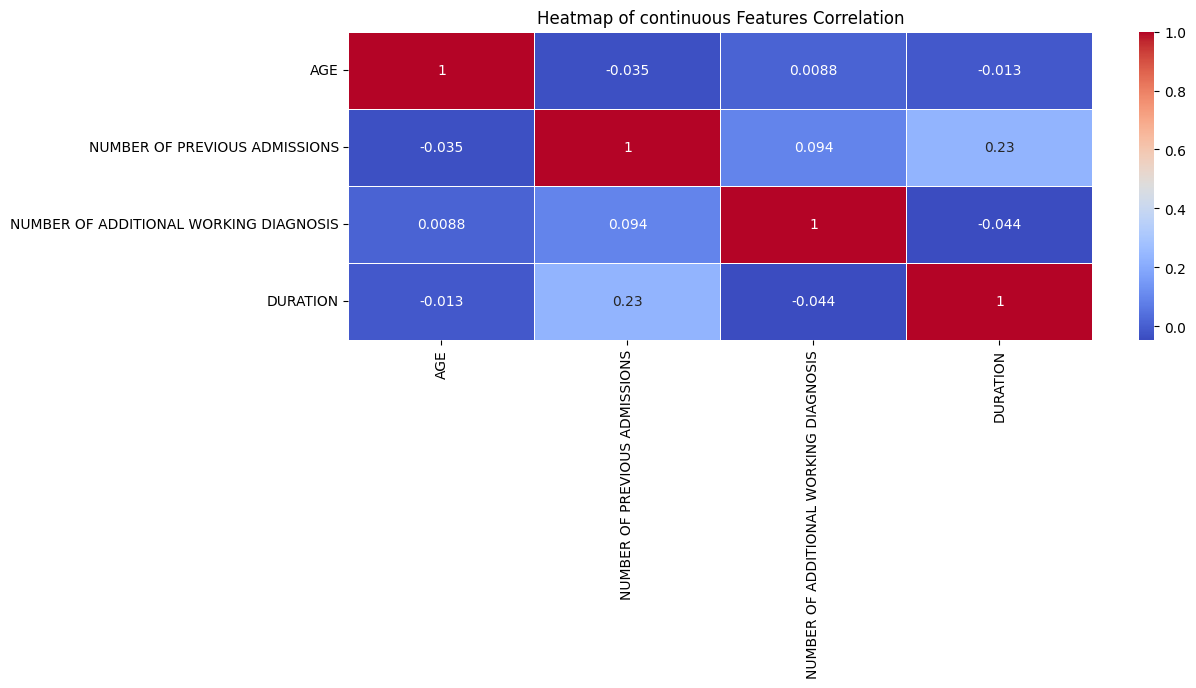

In [115]:
#Visualizing Correlation among the continuous features nluding the target
continuous_features_target = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'DURATION']
plt.figure(figsize=(12,4))
sns.heatmap(data2[continuous_features_target].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of continuous Features Correlation')
plt.show()

In [116]:
#Transforming the continuous features
transform_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']
for col in transform_features:
  data2[col] = np.log1p(data2[col])

#Second transformation
data2['NUMBER OF PREVIOUS ADMISSIONS'] = np.log1p(data2['NUMBER OF PREVIOUS ADMISSIONS'])



In [117]:
#Normalizing and Standardizing continuous features
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
scaler = MinMaxScaler()
data2[normalise_features] = scaler.fit_transform(data2[normalise_features])


<function matplotlib.pyplot.show(close=None, block=None)>

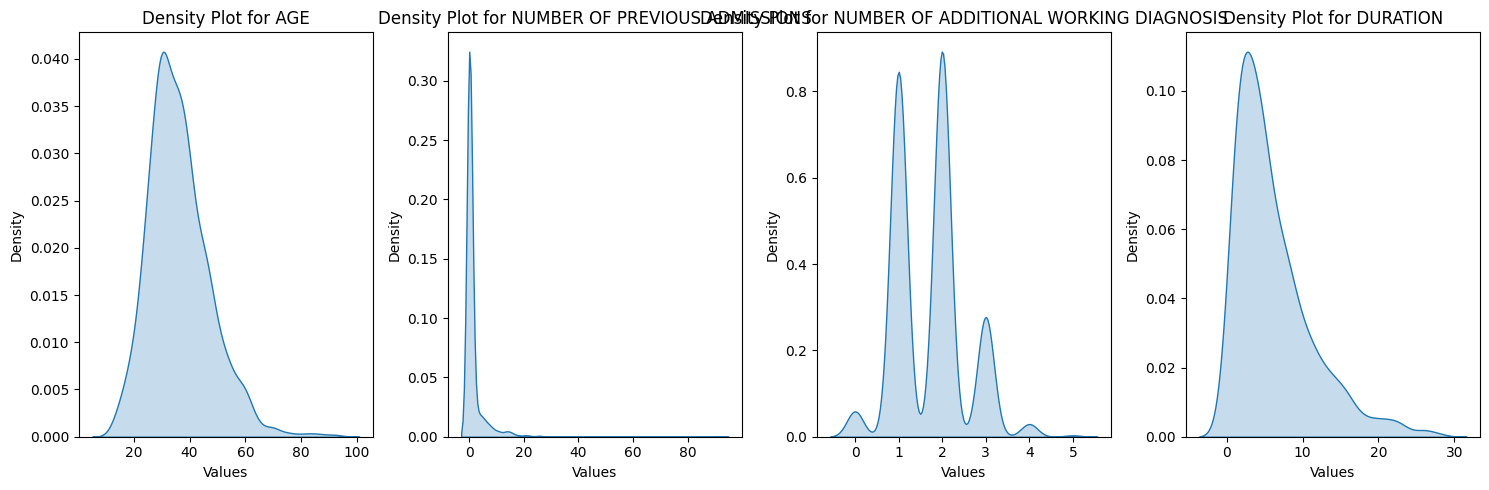

In [118]:
#Plotting Density plot
import seaborn as sns

continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']

fig, axes = plt.subplots(1, len(continuous_features), figsize=(15, 5))

for i, col in enumerate(continuous_features):
  sns.kdeplot(data[col], fill=True,ax=axes[i])
  axes[i].set_title(f'Density Plot for {col}')
  axes[i].set_xlabel('Values')
  axes[i].set_ylabel('Density')
# plt.figure(figsize=(8,9))
# plt.bar(data['AGE'])
plt.tight_layout()
plt.show

In [119]:
data2.sample(2)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,DURATION,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,RELIGION_OTHERS,...,MONTH OF ADMISSION_February,MONTH OF ADMISSION_January,MONTH OF ADMISSION_July,MONTH OF ADMISSION_June,MONTH OF ADMISSION_March,MONTH OF ADMISSION_May,MONTH OF ADMISSION_November,MONTH OF ADMISSION_October,MONTH OF ADMISSION_September,OUT COME_DIED
2376,0.538013,0.613147,0.0,2.197225,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
950,0.304489,0.386853,0.0,2.772589,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [120]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].unique()

array([0.38685281, 0.61314719, 0.77370561, 1.        , 0.8982444 ,
       0.        ])

In [121]:
data2.shape

(1291, 42)

In [122]:
#Saving Preprocced data
#data.to_excel('preprocessed1_TB-4a.xlsx', index=False)

In [123]:
#extracting features and targets

X = data2.drop(columns=continuous_features)
y = data2['DURATION']

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


#**MODEL TRAINING**

In [124]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)


##**Model1**

In [171]:
#neural network Architecture(ANN)
model1 = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='linear')
])

model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse','mae'])
model1.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 500)               19500     
                                                                 
 dense_56 (Dense)            (None, 15)                7515      
                                                                 
 dense_57 (Dense)            (None, 64)                1024      
                                                                 
 batch_normalization_26 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 10)                650       
                                                      

In [172]:
#model1 training and validation
history1 = model1.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.2)



Epoch 1/80
26/26 [==============================] - 3s 16ms/step - loss: 6.2404 - mse: 6.2404 - mae: 1.9338 - val_loss: 2.2711 - val_mse: 2.2711 - val_mae: 1.3388
Epoch 2/80
26/26 [==============================] - 0s 5ms/step - loss: 4.8163 - mse: 4.8163 - mae: 1.7263 - val_loss: 1.7400 - val_mse: 1.7400 - val_mae: 1.1320
Epoch 3/80
26/26 [==============================] - 0s 7ms/step - loss: 3.9978 - mse: 3.9978 - mae: 1.5961 - val_loss: 1.4572 - val_mse: 1.4572 - val_mae: 1.0123
Epoch 4/80
26/26 [==============================] - 0s 5ms/step - loss: 3.4591 - mse: 3.4591 - mae: 1.4464 - val_loss: 1.2963 - val_mse: 1.2963 - val_mae: 0.9505
Epoch 5/80
26/26 [==============================] - 0s 5ms/step - loss: 2.7080 - mse: 2.7080 - mae: 1.2956 - val_loss: 1.1657 - val_mse: 1.1657 - val_mae: 0.8973
Epoch 6/80
26/26 [==============================] - 0s 5ms/step - loss: 2.7914 - mse: 2.7914 - mae: 1.3180 - val_loss: 1.0587 - val_mse: 1.0587 - val_mae: 0.8495
Epoch 7/80
26/26 [=========

In [173]:
#Evaluating the model's performance
test_loss, test_mse, test_mae = model1.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')

9/9 [==============================] - 0s 4ms/step - loss: 0.5101 - mse: 0.5101 - mae: 0.5727
Test Loss: 0.5101022720336914
Test MSE: 0.5101022720336914
Test MAE: 0.572739839553833


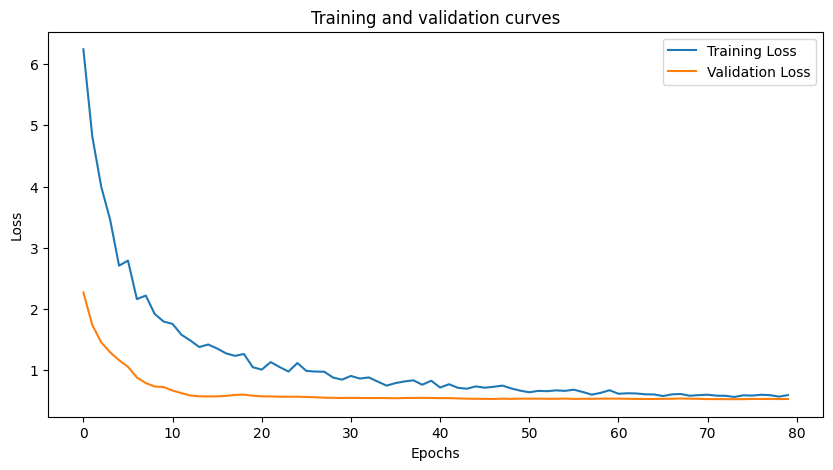

In [174]:
#extracting relevant informationfrom the training history
train_loss =history1.history['loss']
val_loss = history1.history['val_loss']

#Plotting Traing and validation cures
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation curves')
plt.show()

In [175]:
#making predictions
y_pred1 = model1.predict(X_test)

#Changing the shape of the results and getting the loss
y_pred1_= y_pred1.flatten()
residual1 = y_test - y_pred1_

9/9 [==============================] - 0s 2ms/step


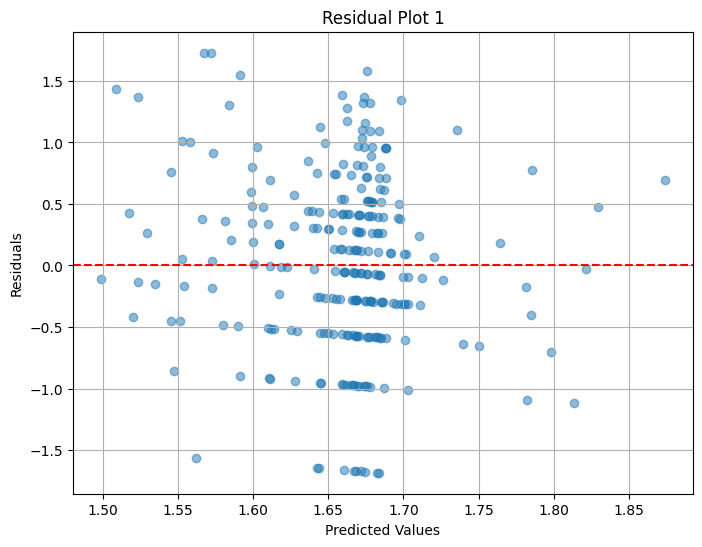

In [176]:
#Plotting the Residual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred1_, residual1,alpha=0.5)
plt.title('Residual Plot 1')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

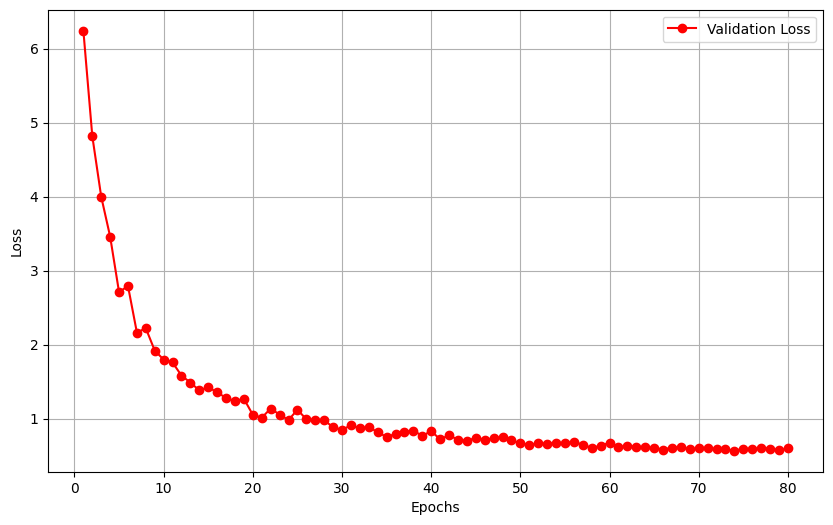

In [177]:
#plotting a learning curve
hist_dict = history1.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs,loss_values,'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

##**Model2**

In [182]:

#A more complex model architecture (ANN)
model2 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='linear')
])

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model2.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 256)               9984      
                                                                 
 batch_normalization_35 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_71 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_36 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_36 (Dropout)        (None, 128)             

In [183]:

history2=model2.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.2)



Epoch 1/80
26/26 [==============================] - 4s 21ms/step - loss: 5.5381 - mae: 1.8396 - mse: 5.5381 - val_loss: 3.0664 - val_mae: 1.5921 - val_mse: 3.0664
Epoch 2/80
26/26 [==============================] - 0s 9ms/step - loss: 5.0048 - mae: 1.7461 - mse: 5.0048 - val_loss: 2.1832 - val_mae: 1.3046 - val_mse: 2.1832
Epoch 3/80
26/26 [==============================] - 0s 8ms/step - loss: 4.2031 - mae: 1.5984 - mse: 4.2031 - val_loss: 1.8126 - val_mae: 1.1585 - val_mse: 1.8126
Epoch 4/80
26/26 [==============================] - 0s 9ms/step - loss: 3.5851 - mae: 1.5279 - mse: 3.5851 - val_loss: 1.5188 - val_mae: 1.0365 - val_mse: 1.5188
Epoch 5/80
26/26 [==============================] - 0s 8ms/step - loss: 3.2783 - mae: 1.4387 - mse: 3.2783 - val_loss: 1.3347 - val_mae: 0.9641 - val_mse: 1.3347
Epoch 6/80
26/26 [==============================] - 0s 9ms/step - loss: 3.2871 - mae: 1.4078 - mse: 3.2871 - val_loss: 1.2377 - val_mae: 0.9257 - val_mse: 1.2377
Epoch 7/80
26/26 [=========

In [184]:

#Evaluating
test_loss, test_mae, test_mse = model2.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')

9/9 [==============================] - 0s 3ms/step - loss: 0.5077 - mae: 0.5722 - mse: 0.5077
Test Loss: 0.5076804757118225
Test MAE: 0.5721819400787354
Test MSE: 0.5076804757118225


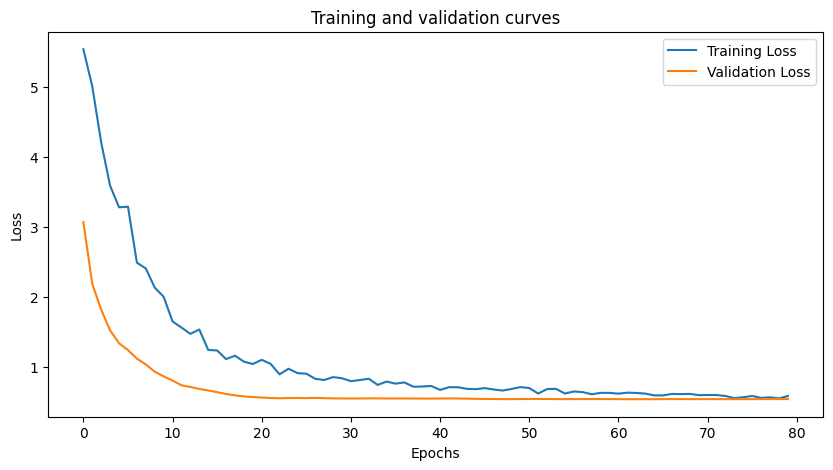

In [185]:
#extracting relevant informationfrom the training history
train_loss =history2.history['loss']
val_loss = history2.history['val_loss']

#Plotting Traing and validation cures
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation curves')
plt.show()

In [155]:
#making predictions
y_pred2 = model2.predict(X_test)
y_pred2_= y_pred2.flatten()
residual2 = y_test - y_pred2_

9/9 [==============================] - 0s 3ms/step


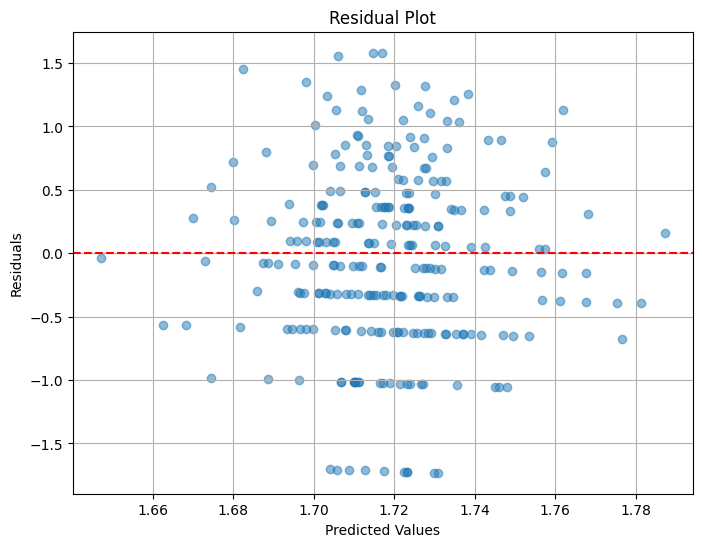

In [156]:
#Plotting the Residual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred2_, residual2,alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

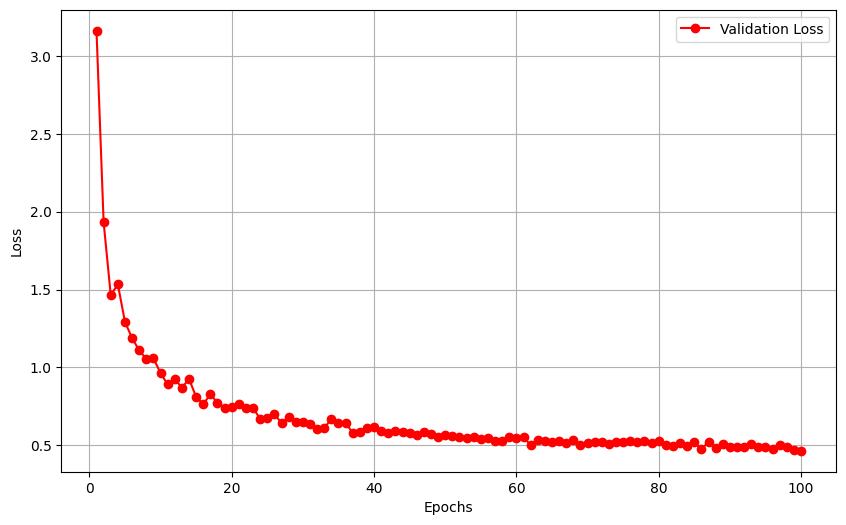

In [136]:
#plotting a learning curve
hist_dict = history2.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs,loss_values,'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

##**Model3**

In [78]:
#creating a neural network model for model3
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
hidden_layer1 = tf.keras.layers.Dense(64, activation='relu')(input_layer)
hidden_layer2 = tf.keras.layers.Dense(20, activation='relu')(hidden_layer1)
output_layer = tf.keras.layers.Dense(1, activation='linear',)(hidden_layer2)

model3 = tf.keras.Model(inputs=input_layer, outputs=output_layer)


In [79]:
#implementing Cross-validation
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam

folds = 10
cross_val = KFold(n_splits=folds, shuffle=True, random_state=42)

i = 0

for train_index, test_index in cross_val.split(X_train, y_train):
  X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index],y.iloc[test_index]

 # optim = Adam(learning_rate=0.01)
  model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse','mae'])

  history3 = model3.fit(X_train_fold, y_train_fold, epochs=100, batch_size=100, validation_data=(X_test_fold, y_test_fold))

  score = model3.evaluate(X_test, y_test)
  i+=1
  print("Validation Scorefor fold {}: {}".format(i, score))

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 3.7364 - mse: 3.7364 - mae: 1.7953 - val_loss: 3.2082 - val_mse: 3.2082 - val_mae: 1.6454
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 2.1822 - mse: 2.1822 - mae: 1.3036 - val_loss: 1.9071 - val_mse: 1.9071 - val_mae: 1.1995
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 1.1922 - mse: 1.1922 - mae: 0.9131 - val_loss: 1.0213 - val_mse: 1.0213 - val_mae: 0.8458
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6453 - mse: 0.6453 - mae: 0.6526 - val_loss: 0.6343 - val_mse: 0.6343 - val_mae: 0.6536
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5581 - mse: 0.5581 - mae: 0.6011 - val_loss: 0.6035 - val_mse: 0.6035 - val_mae: 0.6255
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5528 - mse: 0.5528 - mae: 0.5973 - val_loss: 0.5921 - val_mse: 0.5921 - val_mae: 0.6269
Epoch 7/100
10/10 [==

In [80]:
test3_loss, test3_mse, test3_mae = model3.evaluate(X_test, y_test)

print(f'Test Loss: {test3_loss}')
print(f'Test MAE: {test3_mae}')
print(f'Test MSE: {test3_mse}')

9/9 [==============================] - 0s 2ms/step - loss: 0.9729 - mse: 0.9729 - mae: 0.7910
Test Loss: 0.9728673696517944
Test MAE: 0.7909940481185913
Test MSE: 0.9728673696517944


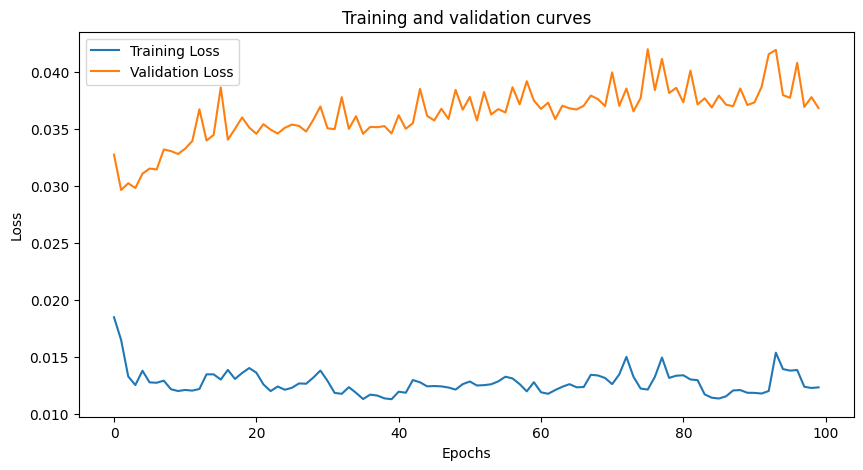

In [140]:
#extracting relevant informationfrom the training history
train_loss =history3.history['loss']
val_loss = history3.history['val_loss']

#Plotting Traing and validation cures
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation curves')
plt.show()

In [81]:
#making predictions
y_pred3 = model3.predict(X_test)
y_pred3_= y_pred3.flatten()
residual3 = y_test - y_pred3_

9/9 [==============================] - 0s 2ms/step


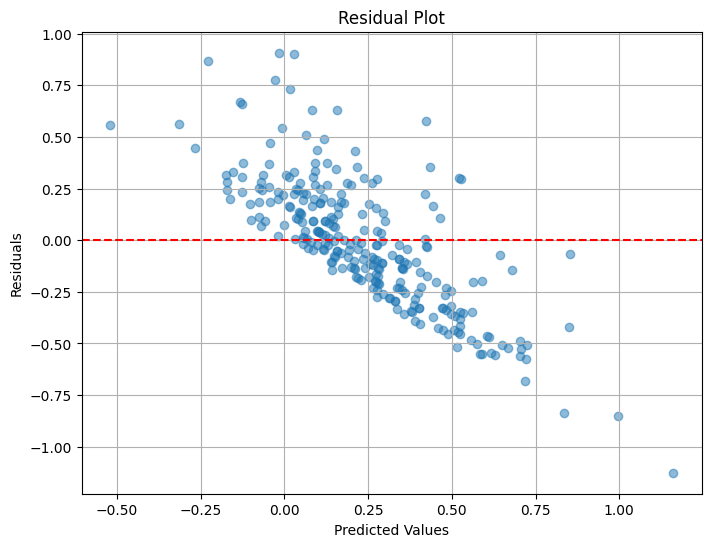

In [ ]:
#Plotting the Residual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred3_, residual3,alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

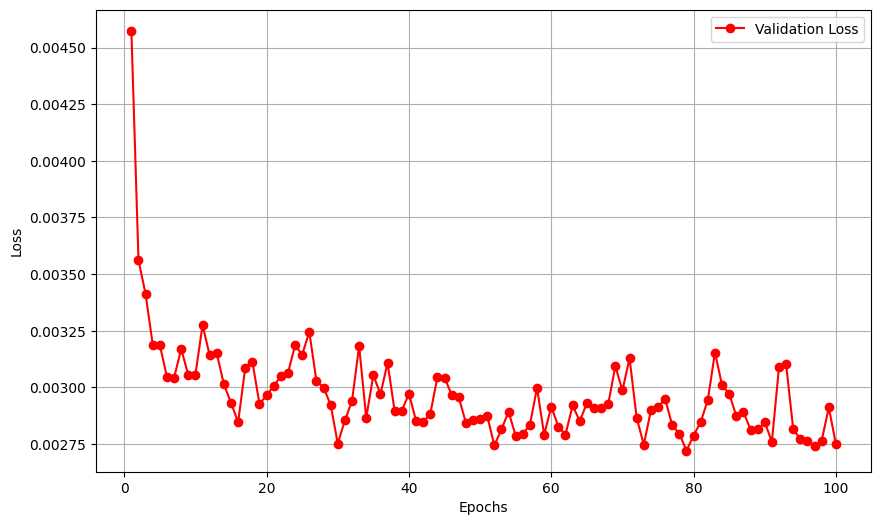

In [ ]:
#plotting a learning curve
hist_dict = history3.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs,loss_values,'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()